In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, confusion_matrix, classification_report, roc_curve

In [ ]:
# Load the dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

Exploratory Data Analysis (EDA)

In [ ]:
# Display data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# Display first few rows of the dataframe
print(df.head())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
# Remove the 'id' column as it does not contribute to the analysis
df = df.drop('id', axis=1)

In [ ]:
# Check and remove duplicates
duplicates = df[df.duplicated()]
print("Duplicates:", duplicates)
df = df.drop_duplicates()

Duplicates: Empty DataFrame
Columns: [gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [ ]:
# Drop rows with missing 'bmi' values
df.dropna(subset=['bmi'], inplace=True)

In [ ]:
# Show unique values in 'gender' and count each category
print("Unique genders:", df['gender'].unique())
print("Gender counts:", df['gender'].value_counts())

Unique genders: ['Male' 'Female' 'Other']
Gender counts: gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64


In [ ]:
# Remove 'Other' from 'gender' as it might not be statistically significant
df = df[df['gender'] != 'Other']

In [ ]:
# Mapping categorical variables to numerical values
gender_mapping = {'Female': 0, 'Male': 1}
ever_married_mapping = {'Yes': 0, 'No': 1}
work_type_mapping = {'Private': 0, 'Self-employed': 1, 'children': 2, 'Govt_job': 3, 'Never_worked': 4}
residence_type_mapping = {'Urban': 0, 'Rural': 1}
smoking_status_mapping = {'never smoked': 0, 'Unknown': 1, 'formerly smoked': 2, 'smokes': 3}


df['gender'] = df['gender'].map(gender_mapping)
df['ever_married'] = df['ever_married'].map(ever_married_mapping)
df['work_type'] = df['work_type'].map(work_type_mapping)
df['Residence_type'] = df['Residence_type'].map(residence_type_mapping)
df['smoking_status'] = df['smoking_status'].map(smoking_status_mapping)

In [ ]:
# Feature selection
x = df.drop(['ever_married', 'stroke'], axis=1)
y = df['stroke']

In [ ]:
# Standardize the data
sc = StandardScaler()
x = sc.fit_transform(x)

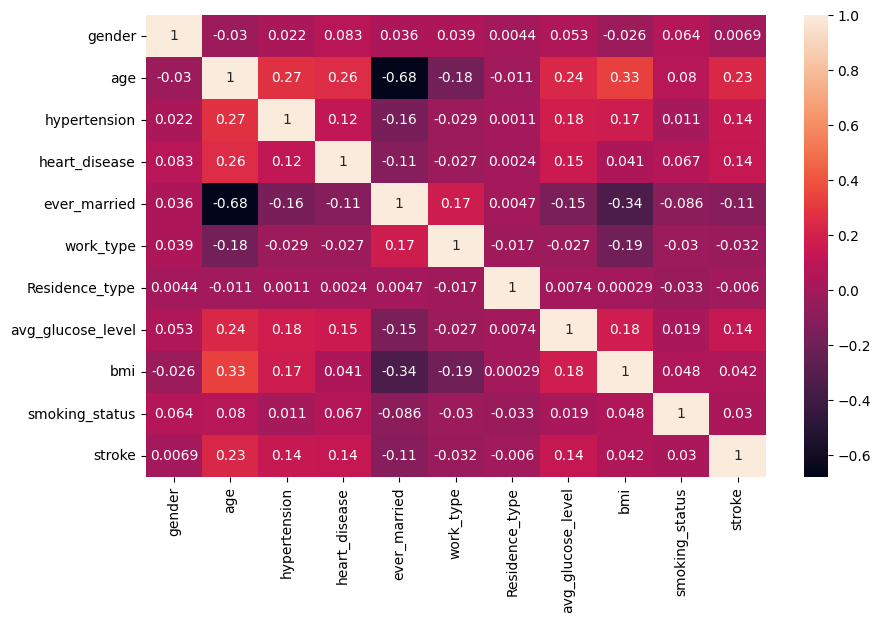

In [ ]:
# Display correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [ ]:
# Apply SMOTE to balance the class distribution
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

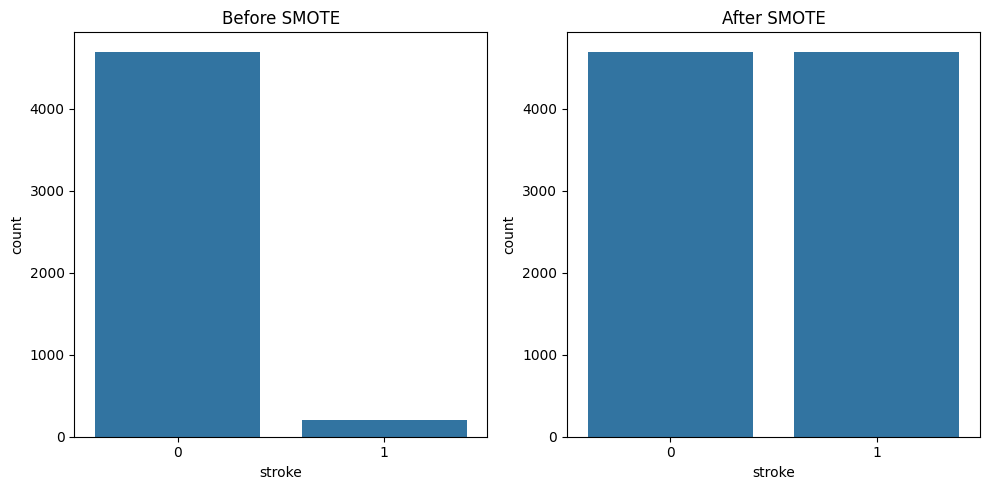

In [ ]:
# Plot class distribution before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(x=y, ax=axes[0]).set_title('Before SMOTE')
sns.countplot(x=y_resampled, ax=axes[1]).set_title('After SMOTE')
plt.tight_layout()
plt.show()

In [ ]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Calculate the percentage of data used for training and testing
training_percentage = len(x_train) / len(x_resampled) * 100
testing_percentage = len(x_test) / len(x_resampled) * 100

# Print out the percentages
print(f"Percentage of data used for training: {training_percentage:.2f}%")
print(f"Percentage of data used for testing: {testing_percentage:.2f}%")

Percentage of data used for training: 80.00%
Percentage of data used for testing: 20.00%


In [ ]:
# Display the number of data points in training and testing sets
# Display the total number of data points
print(f"Total number of data points: {df.shape[0]}")

print(f"Number of data points in training set: {x_train.shape[0]}")
print(f"Number of data points in testing set: {x_test.shape[0]}")

Total number of data points: 4908
Number of data points in training set: 7518
Number of data points in testing set: 1880


In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,0,0,0,228.69,36.6,2,1
2,1,80.0,0,1,0,0,1,105.92,32.5,0,1
3,0,49.0,0,0,0,0,0,171.23,34.4,3,1
4,0,79.0,1,0,0,1,1,174.12,24.0,0,1
5,1,81.0,0,0,0,0,0,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,0,13.0,0,0,1,2,1,103.08,18.6,1,0
5106,0,81.0,0,0,0,1,0,125.20,40.0,0,0
5107,0,35.0,0,0,0,1,1,82.99,30.6,0,0
5108,1,51.0,0,0,0,0,1,166.29,25.6,2,0


In [ ]:
# Initialize and train KNN classifier within a pipeline
knn_model = make_pipeline(StandardScaler(), PCA(n_components=0.95), KNeighborsClassifier(n_neighbors=3, weights='distance'))
knn_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])

In [ ]:
# Predict and evaluate the KNN model
y_train_pred = knn_model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = knn_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("KNN Test Accuracy:", test_accuracy)


KNN Test Accuracy: 0.9377659574468085


In [ ]:
# Initialize and train Random Forest classifier within a pipeline
rf_model = make_pipeline(StandardScaler(), PCA(n_components=0.95), RandomForestClassifier(min_samples_leaf=4, min_samples_split=5, n_estimators=300))
rf_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_leaf=4, min_samples_split=5,
                                        n_estimators=300))])

In [ ]:
# Predict and evaluate the Random Forest model
y_test_pred_rf = rf_model.predict(x_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Random Forest Test Accuracy:", test_accuracy_rf)

Random Forest Test Accuracy: 0.9356382978723404


In [ ]:
# Initialize and train Stacking Classifier
base_models = [('knn', knn_model), ('rf', rf_model)]
final_estimator = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3)
stack = StackingClassifier(estimators=base_models, final_estimator=final_estimator, cv=5)
stack.fit(x_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('knn',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('pca', PCA(n_components=0.95)),
                                                ('kneighborsclassifier',
                                                 KNeighborsClassifier(n_neighbors=3,
                                                                      weights='distance'))])),
                               ('rf',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('pca', PCA(n_components=0.95)),
                                                ('randomforestclassifier',
                                                 RandomForestClassifier(min_samples_leaf=4,
                                                                        min_samples_split=5,
                                                                        n_estimators=300))]))],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.05))

In [ ]:
# Predict and evaluate the Stacking Classifier
stack_pred = stack.predict(x_test)
stack_accuracy = accuracy_score(y_test, stack_pred)
print("Stacking Classifier Test Accuracy:", stack_accuracy)

Stacking Classifier Test Accuracy: 0.9558510638297872


In [ ]:
# Define and display confusion matrices for the classifiers
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


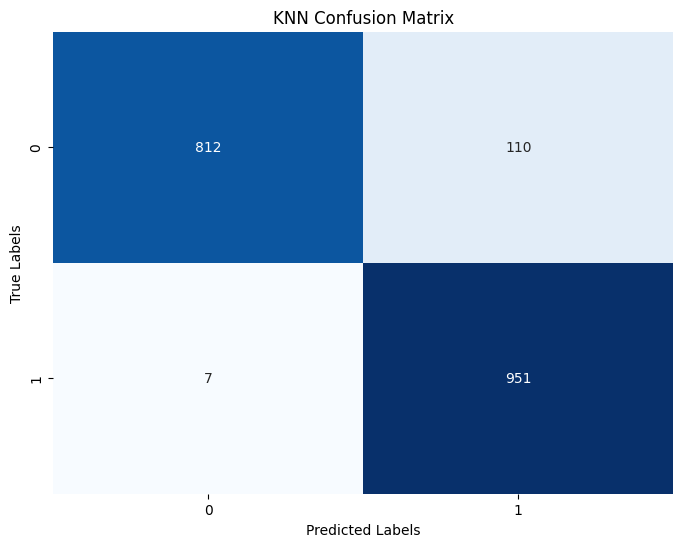

In [ ]:
knn_conf_matrix = confusion_matrix(y_test, y_test_pred)
rf_conf_matrix = confusion_matrix(y_test, y_test_pred_rf)
stack_conf_matrix = confusion_matrix(y_test, stack_pred)

plot_confusion_matrix(knn_conf_matrix, 'KNN Confusion Matrix')

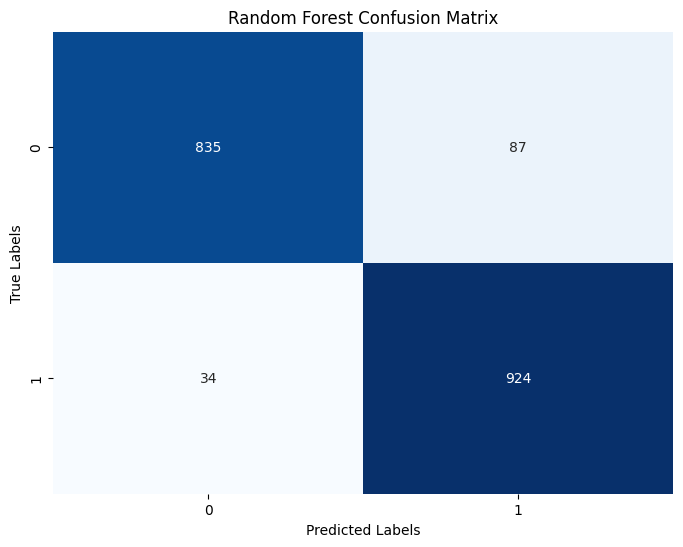

In [ ]:
plot_confusion_matrix(rf_conf_matrix, 'Random Forest Confusion Matrix')

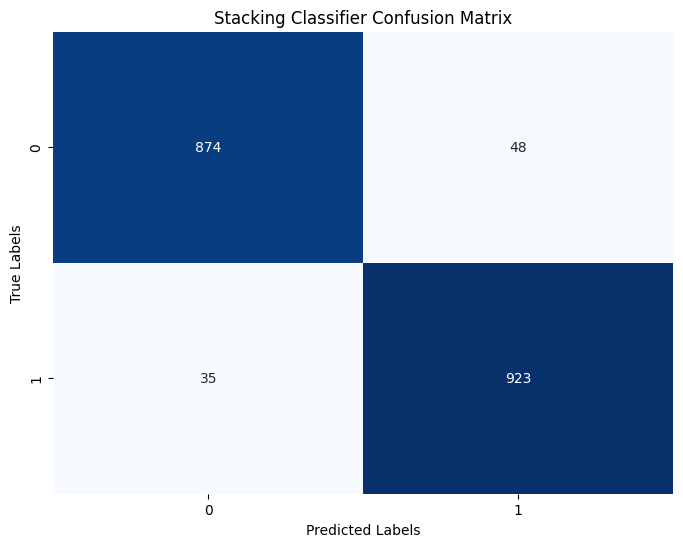

In [ ]:
plot_confusion_matrix(stack_conf_matrix, 'Stacking Classifier Confusion Matrix')

In [ ]:
tn_knn, fp_knn, fn_knn, tp_knn = knn_conf_matrix.ravel()
tn_rf, fp_rf, fn_rf, tp_rf = rf_conf_matrix.ravel()
tn_stack, fp_stack, fn_stack, tp_stack = stack_conf_matrix.ravel()


In [ ]:
# Function to modify classification reports to exclude 'support'
def remove_support_column(report):
    return '\n'.join([line for line in report.split('\n') if not line.strip().startswith('support')])


In [ ]:
# Print classification reports without the 'support' column
print("KNN Classification Report:")
print(remove_support_column(classification_report(y_test, y_test_pred)))

print("Random Forest Classification Report:")
print(remove_support_column(classification_report(y_test, y_test_pred_rf)))

print("Stacking Classifier Classification Report:")
print(remove_support_column(classification_report(y_test, stack_pred)))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       922
           1       0.90      0.99      0.94       958

    accuracy                           0.94      1880
   macro avg       0.94      0.94      0.94      1880
weighted avg       0.94      0.94      0.94      1880

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       922
           1       0.91      0.96      0.94       958

    accuracy                           0.94      1880
   macro avg       0.94      0.94      0.94      1880
weighted avg       0.94      0.94      0.94      1880

Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       922
           1       0.95      0.96      0.96       958

    accuracy                           0.96      1880
   macro avg       0.

In [ ]:
# Plot ROC curves for each model
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(x_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(x_test)[:, 1])
fpr_stack, tpr_stack, _ = roc_curve(y_test, stack.predict_proba(x_test)[:, 1])
roc_auc_knn = roc_auc_score(y_test, knn_model.predict_proba(x_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(x_test)[:, 1])
roc_auc_stack = roc_auc_score(y_test, stack.predict_proba(x_test)[:, 1])

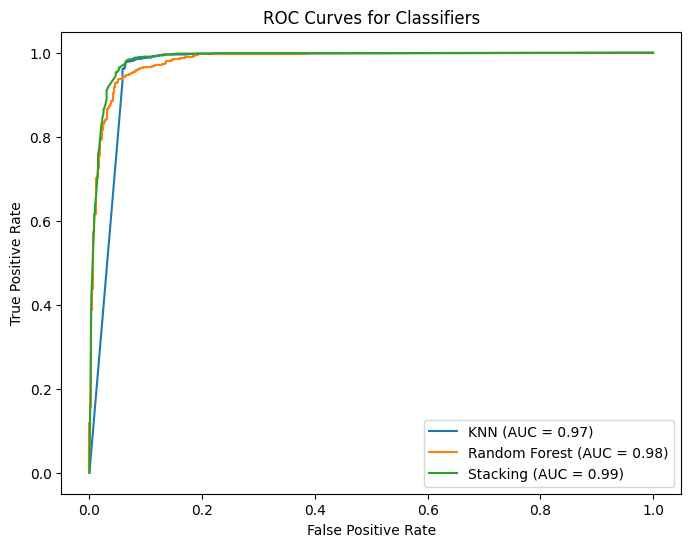

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_stack, tpr_stack, label=f'Stacking (AUC = {roc_auc_stack:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classifiers')
plt.legend(loc='lower right')
plt.show()